In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

In [ ]:
#%cd ..

/home/anuar/PycharmProjects/master-thesis


# Import Data

In [5]:
df, answers, info_dict = get_cluster_input_data(pca_data=True)
df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,gender,...,Q16_Other,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,Q7_last_week_symptom
0,-1.136979,-0.916749,-0.659621,0.396104,1.268714,1.813853,-1.482695,-1.572988,-0.333627,0.0,...,1.0,0.0,0.0,NaN,NaN,4.0,1.0,4.0,15.0,0.0
1,-1.317027,0.587581,-1.392977,0.991426,0.829220,-0.199629,-0.328054,0.789160,1.636139,0.0,...,0.0,1.0,0.0,NaN,NaN,4.0,0.0,0.0,1.0,0.0
2,-1.630848,0.430191,0.923452,-0.009860,-0.634810,0.631976,-0.852655,-0.169432,0.603593,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,1.791578,-0.164591,-0.336503,1.647900,0.016413,-0.520565,-0.869899,0.422450,-0.130984,1.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0
4,-1.370369,-0.498751,0.542570,-0.503827,-1.390884,0.551053,0.878819,-0.160853,-0.594420,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0


In [6]:
info_dict

{'cluster_input_cols': ['PC_0',
  'PC_1',
  'PC_2',
  'PC_3',
  'PC_4',
  'PC_5',
  'PC_6',
  'PC_7',
  'PC_8'],
 'data_path': 'data/preprocessing/dim_reduction/220513_pca_data.csv',
 'fa_data': False,
 'pca_data': True,
 'scaler_type': 'None'}

In [7]:
print('Time period from ' + str(min(df.date)) + ' to ' + str(max(df.date)))

Time period from 2020-08-01 to 2021-02-01


In [9]:
behaviour_cols = info_dict['cluster_input_cols']
behaviour_cols

['PC_0', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8']

# K-means clustering

## Elbow approach to determine ideal amount of clusters

In [10]:
distortions = []
distortions_k = []
list_ch_score = []
K = range(1,9)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(answers)
    labels = kmeanModel.predict(answers)
    if k>1:
      ch_score = metrics.calinski_harabasz_score(answers, labels)
      list_ch_score.append(ch_score)
    distortions.append(kmeanModel.inertia_)
    distortions_k.append(kmeanModel.inertia_/k)



100%|██████████| 8/8 [00:14<00:00,  1.82s/it]


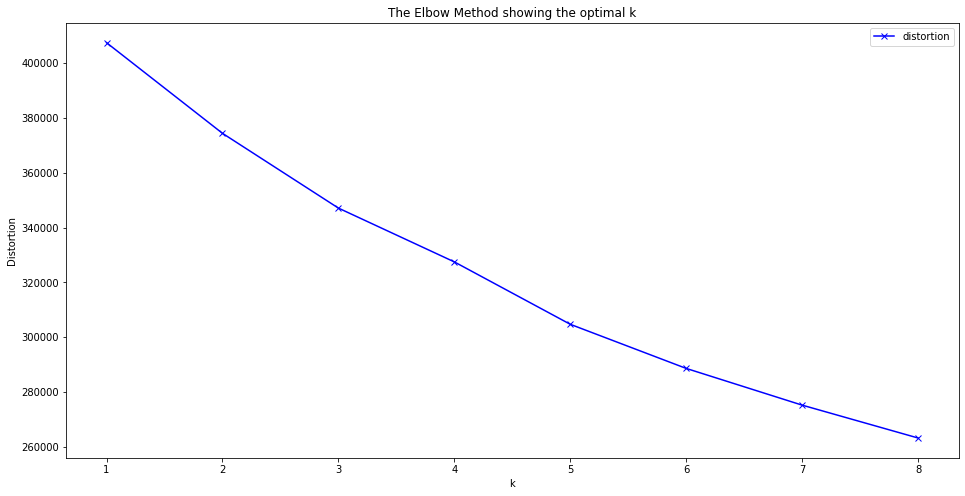

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', label='distortion')
#plt.plot(K, distortions_k, 'rx-', label='distortion/K')
plt.legend()
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

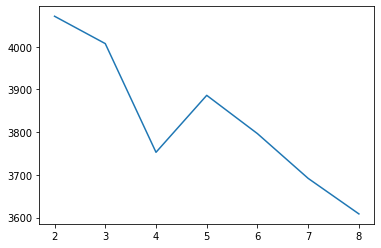

In [12]:
plt.plot(range(2,9), list_ch_score)
plt.show()

## K-means fit

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(answers)

In [26]:
df['group']=kmeans.labels_

In [27]:
df.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,gender,...,Q16_Unsure_of_party_choice,Q16_Venstre,Vaccination_Status,Willingness_Vaccination,Q4_1_nr_contact_nonhouse_family,Q4_2_nr_contact_colleagues,Q4_3_nr_contact_friends,Q4_4_nr_contact_strangers,Q7_last_week_symptom,group
0,-1.136979,-0.916749,-0.659621,0.396104,1.268714,1.813853,-1.482695,-1.572988,-0.333627,0.0,...,0.0,0.0,NaN,NaN,4.0,1.0,4.0,15.0,0.0,1
1,-1.317027,0.587581,-1.392977,0.991426,0.829220,-0.199629,-0.328054,0.789160,1.636139,0.0,...,1.0,0.0,NaN,NaN,4.0,0.0,0.0,1.0,0.0,1
2,-1.630848,0.430191,0.923452,-0.009860,-0.634810,0.631976,-0.852655,-0.169432,0.603593,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,2
3,1.791578,-0.164591,-0.336503,1.647900,0.016413,-0.520565,-0.869899,0.422450,-0.130984,1.0,...,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,2
4,-1.370369,-0.498751,0.542570,-0.503827,-1.390884,0.551053,0.878819,-0.160853,-0.594420,0.0,...,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1


In [28]:
df_sample = df.sample(20000) # used only for quick results, must be changed back to only df to get real score

X = df_sample[behaviour_cols].to_numpy()
labels = df_sample.group.to_numpy()
metrics.silhouette_score(X, labels, metric='euclidean')

0.09500070457126314

K-Means Silhouette Scores:
- 2 Cluster: 0.17
- 3 Cluster: 0.12
- 4 Cluster: 0.11
- 5 Cluster: 0.09
- 7 Cluster: 0.12

# Saving Data

In [ ]:
df.to_csv("data/clustering/220415_k_means_grouped_data.csv",index=False)